# **ESTRUTURA DO PROJETO**

**PASSO 1 - Importar as bibliotecas necessárias**

In [ ]:
import os
import pandas as pd
from IPython.display import HTML
import plotly.express as px

**PASSO 2 - Percorrer todos os arquivos (planilhas) existentes dentro de uma pasta no Google Drive**

In [ ]:
lista_planilhas= os.listdir('/content/drive/MyDrive/Curso Python para ciência de dados/Projeto 2/Arquivos')
display(lista_planilhas)

['Devolucoes+-+Belo+Horizonte.csv',
 'Devolucoes+-+Curitiba.csv',
 'Devolucoes+-+Fortaleza.csv',
 'Devolucoes+-+Goiás.csv',
 'Devolucoes+-+Porto+Alegre.csv',
 'Devolucoes+-+Recife.csv',
 'Devolucoes+-+Rio+de+Janeiro.csv',
 'Devolucoes+-+Salvador.csv',
 'Devolucoes+-+São+Paulo.csv',
 'Vendas+-+Belo+Horizonte.csv',
 'Vendas+-+Curitiba.csv',
 'Vendas+-+Fortaleza.csv',
 'Vendas+-+Goiás.csv',
 'Vendas+-+Porto+Alegre.csv',
 'Vendas+-+Recife.csv',
 'Vendas+-+Rio+de+Janeiro.csv',
 'Vendas+-+Salvador.csv',
 'Vendas+-+São+Paulo.csv']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**PASSO 3 - Importar todos os arquivos (planilhas) de vendas e unificá-las numa única tabela (DataFrame) no Pandas**

In [ ]:
total_vendas = pd.DataFrame()

for planilha in lista_planilhas:
  if "Vendas" in planilha:
    tabela = pd.read_csv(f'/content/drive/MyDrive/Curso Python para ciência de dados/Projeto 2/Arquivos/{planilha}')
    total_vendas = pd.concat([total_vendas, tabela])

display(total_vendas)


,Unnamed: 0,SKU,Produto,Quantidade,Primeiro Nome,Sobrenome,Data,Loja,Valor Unitário,Unnamed: 8
0,17,HL4379,Televisão,2,Carolina,Alfradique,2/25/2023,Belo Horizonte,2500,NaN
1,25,HL4379,Televisão,1,Danilo,Rubim,2/20/2023,Belo Horizonte,2500,NaN
2,27,HL1918,iPhone,5,Bernard,Pedrosa,7/7/2023,Belo Horizonte,5300,NaN
3,54,HL1918,iPhone,5,Lucas,Lemos,12/26/2023,Belo Horizonte,5300,NaN
4,67,HL8851,Notebook,5,Bernardo,Botelho,6/8/2023,Belo Horizonte,3500,NaN
...,...,...,...,...,...,...,...,...,...,...
2221,9981,HL7348,SmartWatch,4,Joío,Junior,4/14/2023,São Paulo,1400,NaN
2222,9984,HL1918,iPhone,4,Itai,Puntel,5/2/2023,São Paulo,5300,NaN
2223,9985,HL1918,iPhone,1,Guilherme,Vianna,3/18/2023,São Paulo,5300,NaN
2224,9991,HL7348,SmartWatch,5,Antônio,Soares,11/21/2023,São Paulo,1400,NaN


**PASSO 4 - Importar todos os arquivos (planilhas) de devoluções e unificá-las numa única tabela (DataFrame) no Pandas**

In [ ]:
total_devolucoes = pd.DataFrame()

for planilha in lista_planilhas:
  if "Devolucoes" in planilha:
    tabela = pd.read_csv(f'/content/drive/MyDrive/Curso Python para ciência de dados/Projeto 2/Arquivos/{planilha}')
    total_devolucoes = pd.concat([total_devolucoes, tabela])
display(total_devolucoes)

,Unnamed: 0,SKU,Produto,Quantidade,Data,Loja,Valor Unitário,Unnamed: 6
0,3,HL1918,iPhone,3,10/31/2023,Belo Horizonte,5300,NaN
1,6,HL7348,SmartWatch,1,2/6/2023,Belo Horizonte,1400,NaN
2,20,HL7348,SmartWatch,3,10/5/2023,Belo Horizonte,1400,NaN
3,21,HL9962,Android,1,5/26/2023,Belo Horizonte,3400,NaN
4,23,HL2714,Tablet,1,4/24/2023,Belo Horizonte,1600,NaN
...,...,...,...,...,...,...,...,...
97,477,HL4379,Televisão,5,4/5/2023,São Paulo,2500,NaN
98,478,HL8851,Notebook,1,10/27/2023,São Paulo,3500,NaN
99,486,HL7348,SmartWatch,5,4/13/2023,São Paulo,1400,NaN
100,487,HL2714,Tablet,2,9/7/2023,São Paulo,1600,NaN


# **INDICADORES**

**1.0 - QUANTIDADE DE VENDAS LÍQUIDAS:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais vendas.

In [ ]:
quantidade_produto_vl = total_vendas[['SKU', 'Produto', 'Quantidade']].groupby(['SKU', 'Produto']).sum().sort_values(by='Quantidade', ascending=False)
quantidade_loja_vl = total_vendas[['Loja', 'Quantidade']].groupby('Loja').sum().sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de vendas líquidas por produto:</h2>'))
display(quantidade_produto_vl.head(3))

display(HTML('<br><br><hr><br>'))

display(HTML('<h2>Quantidade de vendas líquidas por loja:</h2>'))
display(quantidade_loja_vl.head(3))

,,Quantidade
SKU,Produto,
HL1918,iPhone,8974
HL4379,Televisão,5931
HL8851,Notebook,3249


,Quantidade
Loja,
São Paulo,6674
Rio de Janeiro,4393
Fortaleza,4320


In [ ]:
#grafico de pizza
grafico1 = px.pie(quantidade_produto_vl.reset_index(), names='Produto', values='Quantidade', title='Quantidade de vendas líquidas por produto')
grafico1.update_traces(textposition = 'inside', textinfo = 'label+percent')
grafico1.show()

#grafico de barras
grafico2 = px.bar(quantidade_loja_vl.reset_index(), x='Loja', y='Quantidade', title='Quantidade de vendas líquidas por loja', color='Quantidade')
grafico2.show()

**1.1 - QUANTIDADE DE VENDAS BRUTAS:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais vendas.

In [ ]:
quantidade_produto_vb = pd.DataFrame(pd.concat([total_vendas, total_devolucoes]).groupby(['SKU', 'Produto'])['Quantidade'].sum(numeric_only = True)).sort_values(by='Quantidade', ascending=False)

quantidade_loja_vb = pd.DataFrame(pd.concat([total_vendas, total_devolucoes]).groupby(['Loja'])['Quantidade'].sum()).sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de vendas brutas dos 3 principais produtos</h2>'))
display(quantidade_produto_vb.head(3))

display(HTML('<br><br><hr><br>'))

display(HTML('<h2>Quantidade de vendas brutas das 3 principais lojas</h2>'))
display(quantidade_loja_vb.head(3))

,,Quantidade
SKU,Produto,
HL1918,iPhone,9144
HL4379,Televisão,6078
HL8851,Notebook,3423


,Quantidade
Loja,
São Paulo,6974
Rio de Janeiro,4614
Fortaleza,4591


In [ ]:
#grafico de barras

grafico3 = px.bar(
    quantidade_produto_vb.reset_index(),
    x = 'Produto',
    y = 'Quantidade',
    title = 'Quantidade de vendas brutas por produto',
    color = 'Produto'
)
#se fosse para colocar cores ao gráfico:
'''grafico3.update_layout(
    plot_bgcolor = 'yellow',
    paper_bgcolor = 'green',
    font_color = 'white'
)'''
grafico3.show()

grafico4 = px.bar(
    quantidade_loja_vb.reset_index(),
    x = 'Loja',
    y = 'Quantidade',
    title = 'Quantidade de vendas brutas por loja',
    color = 'Loja'
)

grafico4.show()

**1.2 - QUANTIDADE DE DEVOLUÇÕES:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais devoluções.

In [ ]:
quantidade_produto_d = total_devolucoes[['Produto', "Quantidade"]].groupby(['Produto']).sum().sort_values(by='Quantidade', ascending=False)
quantidade_loja_d = total_devolucoes[['Loja', 'Quantidade']].groupby(['Loja']).sum().sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de devoluções dos 3 principais produtos</h2>'))
display(quantidade_produto_d.head(3))

display(HTML('<br><br><hr><br>'))

display(HTML('<h2>Quantidade de devoluções das 3 principais lojas</h2>'))
display(quantidade_loja_d.head(3))

,Quantidade
Produto,
SmartWatch,395
Tablet,301
Android,187


,Quantidade
Loja,
São Paulo,300
Fortaleza,271
Rio de Janeiro,221


Text(0.5, 1.0, 'Quantidade de devoluções por produto e por loja')

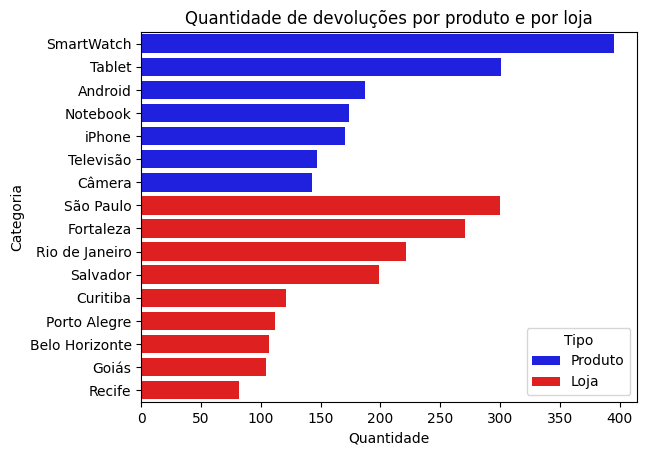

In [ ]:
import seaborn as sns
#criar dataframe para graficos com base nos dataframes originais
quantidade_produto_d_grafico = pd.DataFrame(
    {
        'Categoria': quantidade_produto_d.index,
        'Quantidade' : quantidade_produto_d['Quantidade'],
        'Tipo' :  ['Produto'] * len(quantidade_produto_d)
    }
)
quantidade_loja_d_grafico = pd.DataFrame(
    {
       'Categoria' : quantidade_loja_d.index,
       'Quantidade' :  quantidade_loja_d['Quantidade'],
       'Tipo' : ['Loja'] * len(quantidade_loja_d)
    }
)

#concatenar os Dataframes
df_concatenado = pd.concat([quantidade_produto_d_grafico, quantidade_loja_d_grafico])

#plotar grafico de barras horizontais
cores = {'Produto':'blue', 'Loja': 'red'}
grafico5 = sns.barplot(data = df_concatenado, x = 'Quantidade', y = 'Categoria', hue = 'Tipo', orient='h', palette= cores)
grafico5.set_title('Quantidade de devoluções por produto e por loja')
# grafico5.set_xlabel('Rótulo do eixo X')
# grafico5.set_ylabel('Rótulo do eixo Y')


**2.0 - ANÁLISE DE SAZONALIDADE:**

**Objetivo:** Calcular a variação das vendas dos produtos por mês.

In [ ]:
data_formatada = pd.to_datetime(total_vendas['Data'], format='%m/%d/%Y')
vendas_mensais = pd.DataFrame(
    {
        'Data' : data_formatada,
        'Quantidade' : total_vendas['Quantidade']
    }
)
vendas_mensais = vendas_mensais.set_index('Data').resample('M').sum() #começando pelo indice pela data

vendas_mensais.index = vendas_mensais.index.strftime('%b/%y') #formatando data
vendas_mensais['Variacao'] = vendas_mensais['Quantidade'].diff()

display(HTML('<h2>Variação da quantidade de produtos vendudos por mês</h2>'))
display(vendas_mensais)

<ipython-input-16-128f6acff800>:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,Quantidade,Variacao
Data,,
Jan/23,2553,NaN
Feb/23,2508,-45.0
Mar/23,2538,30.0
Apr/23,2366,-172.0
May/23,2357,-9.0
Jun/23,2584,227.0
Jul/23,2666,82.0
Aug/23,2400,-266.0
Sep/23,2446,46.0


In [ ]:
import numpy as np
#grafico de linha
text_color =  np.where(vendas_mensais['Variacao'] < 0, 'red', 'blue')

grafico6 = px.line(vendas_mensais.reset_index(), x='Data', y='Quantidade', title='Vendas Mensais x Sazonalidade', markers=True, text=vendas_mensais['Quantidade'])
grafico6.update_traces(textposition='top center', textfont=dict(color=text_color, size=15), marker=dict(color=text_color))

grafico6.show()

**2.1 - ANÁLISE DE FATURAMENTO TRIMESTRAL:**

**Objetivo:** Calcular o faturamento trimestral do ano.

In [ ]:
faturamento_trimestral = pd.DataFrame(
    {
        'Data' : data_formatada,
        'Quantidade' : total_vendas['Quantidade'],
        'Valor Unitário' : total_vendas['Valor Unitário'],
        'Faturamento' : total_vendas['Quantidade'] * total_vendas['Valor Unitário']
    }
)

faturamento_trimestral['Trimestre'] = faturamento_trimestral['Data'].dt.to_period('Q')

faturamento_trimestral = pd.DataFrame(faturamento_trimestral.groupby('Trimestre')['Faturamento'].sum())

display(HTML('<h2>Faturamento Trimestral</h2>'))
display(faturamento_trimestral)

,Faturamento
Trimestre,
2023Q1,25038900
2023Q2,24163700
2023Q3,24970600
2023Q4,25146300


In [ ]:
#grafico de area

faturamento_trimestral.index = faturamento_trimestral.index.astype(str)

text_color =  np.where(faturamento_trimestral['Faturamento'].diff() < 0, 'red', 'blue')

grafico7 = px.area(
    faturamento_trimestral.reset_index(),
    x='Trimestre',
    y='Faturamento',
    title='Faturamento trimestral',
    markers=True)

grafico7.update_layout(
    xaxis_title = 'Titulo do Eixo X',
    yaxis_title = 'Titulo do Eixo Y',
    margin=dict(t=50, l=300, r=300, b=50),
    title=dict(x=0.5)
)

grafico7.update_traces(
   fillcolor='rgba(27, 239, 143, 0.2)',
   line_color = 'rgba(27, 239, 143, 1)',
   marker=dict(color=text_color)
)

grafico7.show()